## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
numberofmice = len(merge_df['Mouse ID'])
print("There Are " + str(numberofmice) + " Mice")
numberofumice = merge_df['Mouse ID'].nunique()
print("There Are " + str(numberofumice) + " Unique Mice")

There Are 1893 Mice
There Are 249 Unique Mice


In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# the below returns all the duplicate Mouse ID's
duplicated_values = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicated_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#group the clean_df by "Drug Regimen"
groupbydrug = clean_df.groupby(clean_df["Drug Regimen"])

#create variables for each calculation that can place into dictionary/dataframe later
tumormean = round(groupbydrug["Tumor Volume (mm3)"].mean(), 6)
tumormedian = round(groupbydrug["Tumor Volume (mm3)"].median(), 6)
tumorvar = round(groupbydrug["Tumor Volume (mm3)"].var(), 6)
tumorstd = round(groupbydrug["Tumor Volume (mm3)"].std(), 6)
tumorsem = round(groupbydrug["Tumor Volume (mm3)"].sem(), 6)

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_dict = [{"Mean Tumor Volume": tumormean, "Median Tumor Volume": tumormedian}]
drug_stats = pd.DataFrame({'Mean Tumor Volume': tumormean,
                              'Median Tumor Volume': tumormedian,
                              'Tumor Volume Variance': tumorvar,
                              'Tumor Volume Std. Dev.': tumorstd,
                            'Tumor Volume Std. Err.': tumorsem
                          })
#print
drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats2 = groupbydrug.agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem' ]})
drug_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

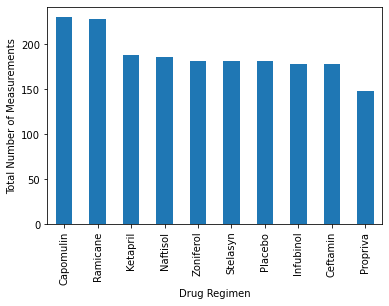

<Figure size 432x288 with 0 Axes>

In [69]:
#Create DF that holds the count of Mice tested per drug

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
miceperdrug = groupbydrug["Mouse ID"].count()
#sort to match example graph
miceperdrug = miceperdrug.sort_values(ascending=False)

# Create a bar chart based off of the group series from before
miceperdrug_chart = miceperdrug.plot(kind='bar')

# Set the xlabel and ylabel using class methods
miceperdrug_chart.set_xlabel("Drug Regimen")
miceperdrug_chart.set_ylabel("Total Number of Measurements")

#show bar chart
plt.show()
plt.tight_layout()

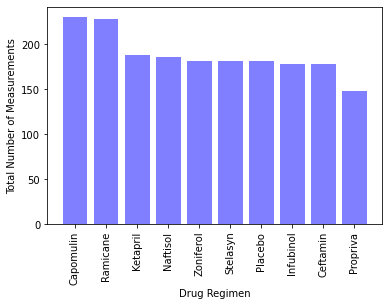

<Figure size 432x288 with 0 Axes>

In [70]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#put drugs used on each mouse into a list for graph
drugregimen = miceperdrug.index.tolist()

#set # x_axis values for drugs in list
x_axis = np.arange(len(miceperdrug))

# Create a bar chart based upon the above data
plt.bar(x_axis, miceperdrug, color="b", alpha=0.5, align="center")

# Create the ticks (drug names) for our bar chart's x axis
tick_locations = [value for value in x_axis]

#plot drug names and format
plt.xticks(tick_locations, drugregimen, color='k', rotation="vertical")

#label x & y axis
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

#show bar chart
plt.show()
plt.tight_layout()

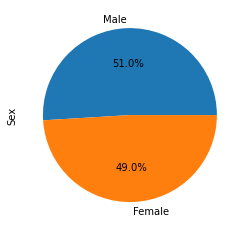

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group clean_df by gender
groupbygender = clean_df["Sex"].value_counts()

#set color formatting
colors=["blue", "orange"]

#Create the pie based upon the values above
groupbygender.plot(kind="pie",autopct="%1.1f%%")

#plt.title("Title")
plt.ylabel("Sex")
plt.show()

([<matplotlib.patches.Wedge at 0x21751bc0a00>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Female'),
  Text(0.033082014082615095, -1.0995024239828841, 'Male')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

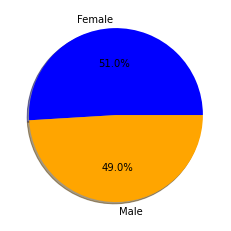

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female",'Male']

# The colors of each section of the pie chart
colors = ["blue", "orange"]

#generate pie plot based on groupbygender df using labels/colors above
plt.pie(groupbygender, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#create a df grouped by "Mouse ID" w/ only the max "Timepoint"
maxtime = clean_df.groupby(["Mouse ID"])['Timepoint'].max()

#reset index so can merge w/ clean_df
maxtime = maxtime.reset_index()

In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = maxtime.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')

In [25]:
# # Put treatments into a list for for loop (and later for plot labels)

# #FIRST I TRIED PUTTING THEM IN A DICTIONARY (with help from instructor: Will) BUT FOR SOME REASON IT 
# #WOULDN'T FIND BOTH OUTLIERS FOR "Infubinol"

# sample_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# # Create empty list to fill with tumor vol data (for plotting)
# tumor_volumes = {}

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     # Locate the rows which contain mice on each drug and get the tumor volumes
#     # add subset 
#     # Determine outliers using upper and lower bounds

# # Loop through the list 
# for drug in sample_drugs:
#     tvolume = merged.loc[merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
#     tumor_volumes[drug] = tvolume

# for key, value in tumor_volumes.items():
    
#     quartiles = value.quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq

#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
    
#     lower_outliers = [v for v in value.tolist() if v < lower_bound]
#     upper_outliers = [v for v in value.tolist() if v > upper_bound]
#     print(key, upper_outliers, lower_outliers)

In [72]:
#TUTOR (Ibrahim Jabarkhil) HELPED REWORK TO PUT INTO LIST

# Put treatments into a list for for loop (and later for plot labels)

sample_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

# Loop through the sample_drug list 
for drug in sample_drugs:
    #set tvolume = to the value in "Tumor Volume (mm3)" for each drug in "sample_drugs"
    tvolume = merged.loc[merged['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    #add each tvolume to  list tumor_volumes
    tumor_volumes.append(tvolume)
  
    # Determine outliers using upper and lower bounds
    quartiles = tvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #add outliers for each drug into outlier list
    outlier = tvolume.loc[(tvolume < lower_bound) | (tvolume > upper_bound)]
    
    #print
    print(drug, outlier)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


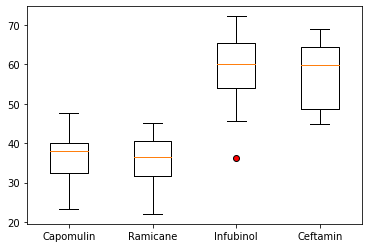

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_dot = dict(markerfacecolor='r', marker='o')
#create boxplot using the lists created in for loop
plt.boxplot(tumor_volumes, labels=sample_drugs,flierprops=red_dot)
plt.show()

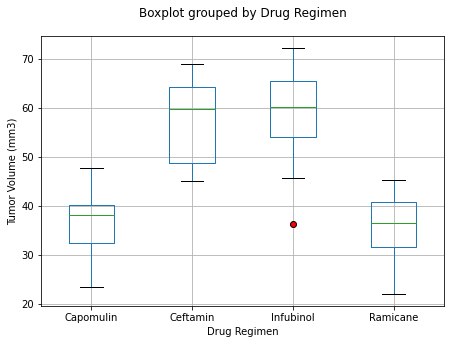

In [84]:
#Here is the first way I created my boxplot, but the formatting is slightly off.  
#Also requires you to sort down to only "sample_drugs"

# sortbydrug = merged.set_index('Drug Regimen')

# sample_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# tumorresults = sortbydrug.loc[(sample_drugs)].reset_index()
# tumorresults

# red_dot = dict(markerfacecolor='r', marker='o')
# box_plot = tumorresults.boxplot(by="Drug Regimen",column =["Tumor Volume (mm3)"], flierprops=red_dot, figsize=(7,5))
# box_plot.set_ylabel("Tumor Volume (mm3)");

# plt.title("")
# plt.tight_layout
# plt.show()

## Line and Scatter Plots

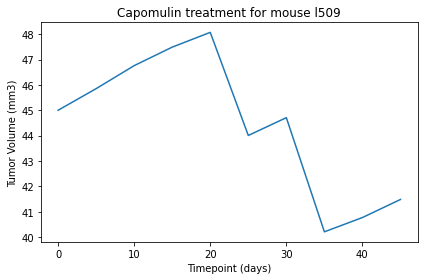

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#sort clean_df down to only the mouse titled "l509"
subjectmouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']

#create a plot using "Timepoint" & "Tumor Volume (mm3)"
plt.plot(subjectmouse['Timepoint'], subjectmouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment for mouse l509")

# Show the chart
plt.tight_layout()
plt.show()

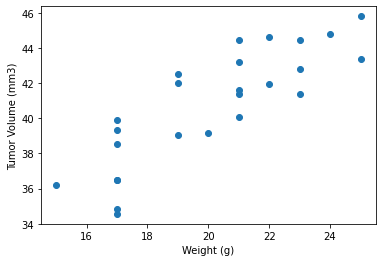

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#isolate the drug "Capomulin" from the clean_df 
cap = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#group by each mouse so we can calculate the average for tumor volume & weight
groupbymouse = cap.groupby(['Mouse ID']).mean()

plt.scatter(groupbymouse['Weight (g)'], groupbymouse['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Show the chart
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


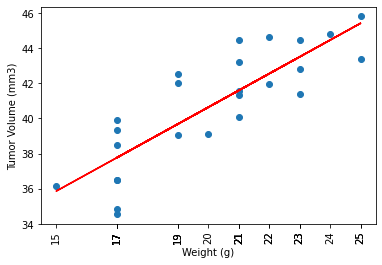

<Figure size 432x288 with 0 Axes>

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#store these series into variables for easy calculations
weight = groupbymouse['Weight (g)']
volume = groupbymouse['Tumor Volume (mm3)']

# Perform a linear regression on average weight versus tumor volume

#used stats library to calculate the value of each
slope, intercept, rvalue, p, std_err = st.linregress(weight, volume)

# Create equation of line to calculate predicted volume at weight
fit = slope * weight + intercept

#print correlation between weight & tumor volume
rvalue = round(rvalue,2)
print(f"The correlation between mouse weight and average tumor volume is {rvalue}")

# Plot the linear model on top of scatter plot 
plt.scatter(weight,volume)
plt.plot(weight,fit,"r-")
plt.xticks(weight, rotation=90)

#add labels
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Show the chart
plt.tight_layout()
plt.show()